In today’s rapidly changing environment, climate change is no longer just an ecological concern—it is a critical business and economic challenge. Companies, policymakers, and investors need data-driven insights to assess climate risks, understand economic vulnerabilities, and develop strategies for sustainability and resilience.



Assess Climate Vulnerability: Identify how climate-related events impact health, economic growth e.t.c

Quantify Financial Risks: Measure economic losses due to climate-related disasters and forecast future risks.

Develop Risk Mitigation Strategies: Provide actionable insights to improve climate resilience and sustainability.

Enable Data-Driven Decision-Making: Utilize AI-powered models to predict the long-term effects of climate change.

Using the Climate Risk Index dataset, we provide comprehensive analysis on climate change’s impact on public health, economic stability, and global risk factors.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and read the CSV
climate_risk_df = pd.read_csv("Data/Climate Change - datasets/Climate Risk Index.csv")


In [5]:
# Display the first few rows to understand its structure
climate_risk_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [6]:
climate_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

The dataset consists of 182 entries and 17 columns, with key information on climate risk, fatalities, and economic losses. Here’s a breakdown:

Key Observations:

1. Climate Risk Index (CRI)

cri_rank: Ranking of countries based on climate risk (lower = more vulnerable).

cri_score: Overall climate risk score (higher = more risk).

2. Health Impact (Fatalities)

fatalities_per_100k_total: Climate-related fatalities per 100,000 people.

fatalities_total: Total fatalities from climate-related events.

fatalities_rank: Ranking of countries by climate-related deaths.

3. Economic Impact

losses_per_gdp__total: Percentage of GDP lost due to climate disasters (131 non-null values, meaning some missing data).

losses_usdm_ppp_total: Total financial losses in million USD (adjusted for purchasing power parity).

losses_per_gdp__rank: Rank based on GDP losses.

4. Country Information

country: Name of the country.

rw_country_code and rw_country_name: Country identifiers (some missing values).

5. Missing Data

the_geom and the_geom_webmercator are empty (not useful for analysis).

losses_per_gdp__total has 51 missing values.


In [7]:
# Drop columns that have no useful data (the_geom and the_geom_webmercator)
climate_risk_df = climate_risk_df.drop(columns=['the_geom', 'the_geom_webmercator'])

In [8]:
# Handle missing values
# - Fill missing 'losses_per_gdp__total' with median (as it represents economic loss percentages)
climate_risk_df['losses_per_gdp__total'].fillna(climate_risk_df['losses_per_gdp__total'].median(), inplace=True)

# - Drop rows with missing country information
climate_risk_df = climate_risk_df.dropna(subset=['rw_country_code', 'rw_country_name'])

In [9]:
climate_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 181
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      179 non-null    int64  
 1   cartodb_id                 179 non-null    int64  
 2   country                    179 non-null    object 
 3   cri_rank                   179 non-null    int64  
 4   cri_score                  179 non-null    float64
 5   fatalities_per_100k_rank   179 non-null    int64  
 6   fatalities_per_100k_total  179 non-null    float64
 7   fatalities_rank            179 non-null    int64  
 8   fatalities_total           179 non-null    int64  
 9   losses_per_gdp__rank       179 non-null    int64  
 10  losses_per_gdp__total      179 non-null    float64
 11  losses_usdm_ppp_rank       179 non-null    int64  
 12  losses_usdm_ppp_total      179 non-null    float64
 13  rw_country_code            179 non-null    object 

In [10]:
# Summary statistics
climate_risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,179.0,89.368715,52.350035,0.0000,44.5000,89.0000,133.5000,181.0000
cartodb_id,179.0,90.368715,52.350035,1.0000,45.5000,90.0000,134.5000,182.0000
cri_rank,179.0,85.005587,44.816793,1.0000,45.0000,91.0000,135.0000,135.0000
cri_score,179.0,81.611508,34.653027,12.1700,52.5000,77.5000,124.5000,124.5000
fatalities_per_100k_rank,179.0,78.234637,37.988625,1.0000,45.5000,91.0000,114.0000,114.0000
fatalities_per_100k_total,179.0,0.528101,3.421780,0.0000,0.0000,0.0200,0.1250,43.6600
fatalities_rank,179.0,77.290503,37.604902,1.0000,45.5000,90.0000,114.0000,114.0000
fatalities_total,179.0,88.234637,430.798750,0.0000,0.0000,2.0000,24.5000,4317.0000
losses_per_gdp__rank,179.0,85.229050,44.845904,1.0000,45.5000,92.0000,135.0000,135.0000
losses_per_gdp__total,179.0,1.133185,7.012131,0.0001,0.0391,0.0841,0.1704,77.3694


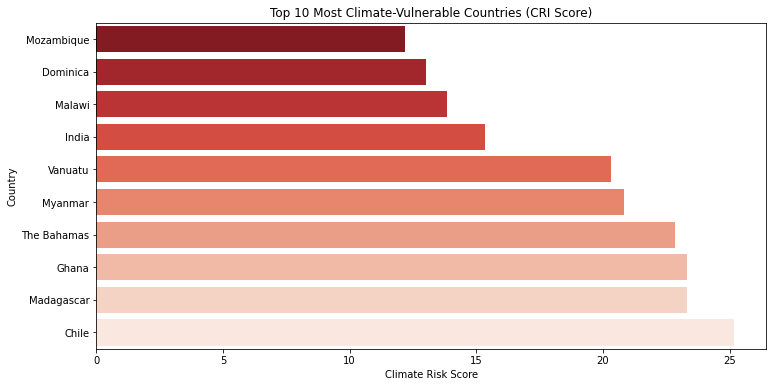

In [11]:
# Top 10 most climate-affected countries based on CRI rank
top_10_climate_risk = climate_risk_df.nsmallest(10, 'cri_rank')

# Visualization: Climate Risk Index Rankings
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_climate_risk['country'], x=top_10_climate_risk['cri_score'], palette='Reds_r')
plt.xlabel("Climate Risk Score")
plt.ylabel("Country")
plt.title("Top 10 Most Climate-Vulnerable Countries (CRI Score)")
plt.show()

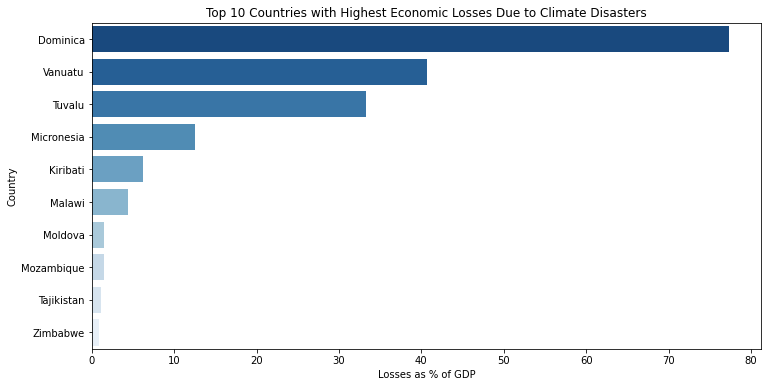

In [12]:
# Visualization: Economic Losses (Top 10 countries with highest GDP losses)
top_10_economic_losses = climate_risk_df.nlargest(10, 'losses_per_gdp__total')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_economic_losses['country'], x=top_10_economic_losses['losses_per_gdp__total'], palette='Blues_r')
plt.xlabel("Losses as % of GDP")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Economic Losses Due to Climate Disasters")
plt.show()

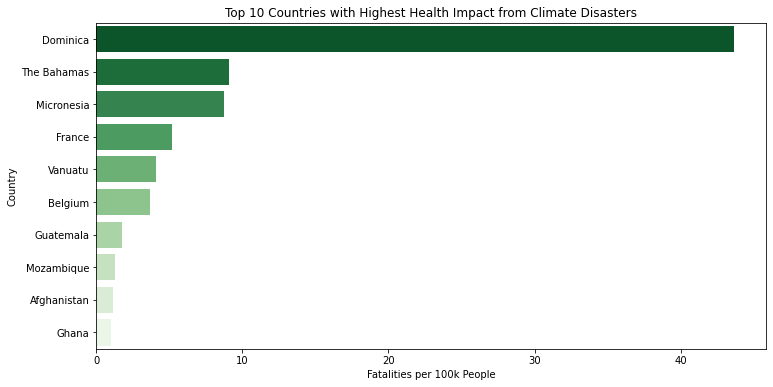

In [13]:
# Visualization: Health Impact (Top 10 countries with highest fatalities per 100k)
top_10_health_impact = climate_risk_df.nlargest(10, 'fatalities_per_100k_total')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_health_impact['country'], x=top_10_health_impact['fatalities_per_100k_total'], palette='Greens_r')
plt.xlabel("Fatalities per 100k People")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Health Impact from Climate Disasters")
plt.show()

In [14]:
# Load and read the CSV
climate_change_df = pd.read_csv("Data/Climate Change - datasets/climate_change_dataset.csv")


In [48]:
climate_change_df.head(20)

,Year,Country,Avg temperature (°c),Co2 emissions (tons/capita),Sea level rise (mm),Rainfall (mm),Population,Renewable energy (%),Extreme weather events,Forest area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
5,2020,China,32.3,1.4,2.7,2100,1202028857,49.4,12,47.2
6,2006,Argentina,30.7,11.6,3.9,1755,586706107,41.9,10,50.5
7,2018,South Africa,33.9,6.0,4.5,827,83947380,17.7,1,56.6
8,2022,UK,27.8,16.6,1.5,1966,980305187,8.2,4,43.4
9,2010,Australia,18.3,1.9,3.5,2599,849496137,7.5,5,48.7


In [17]:
climate_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.2+ KB


In [18]:
climate_change_df.shape

(1000, 10)

it contains global climate change indicators for multiple countries and years. Key columns include:

General Information:

Year – The year of the recorded data.

Country – Name of the country.

Climate Indicators:

Avg Temperature (°C) – Average annual temperature.

CO2 Emissions (Tons/Capita) – Per capita CO₂ emissions.

Sea Level Rise (mm) – Increase in sea levels.

Rainfall (mm) – Total annual rainfall.

Extreme Weather Events – Count of major climate-related disasters.

Economic and Environmental Factors:

Population – Total population.

Renewable Energy (%) – Share of energy from renewable sources.

Forest Area (%) – Percentage of land covered by forests.

In [19]:
# Capitalize the first letter of all column names in the dataset
climate_change_df.columns = [col.capitalize() for col in climate_change_df.columns]
climate_risk_df.columns = [col.capitalize() for col in climate_risk_df.columns]

In [20]:
climate_change_df.columns

Index(['Year', 'Country', 'Avg temperature (°c)',
       'Co2 emissions (tons/capita)', 'Sea level rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable energy (%)', 'Extreme weather events',
       'Forest area (%)'],
      dtype='object')

In [21]:
climate_risk_df.columns

Index(['Index', 'Cartodb_id', 'Country', 'Cri_rank', 'Cri_score',
       'Fatalities_per_100k_rank', 'Fatalities_per_100k_total',
       'Fatalities_rank', 'Fatalities_total', 'Losses_per_gdp__rank',
       'Losses_per_gdp__total', 'Losses_usdm_ppp_rank',
       'Losses_usdm_ppp_total', 'Rw_country_code', 'Rw_country_name'],
      dtype='object')

In [22]:
# Merge datasets based on 'Country' column
merged_df = pd.merge(climate_change_df, climate_risk_df, on="Country", how="inner")



In [28]:
merged_df.head()

,Year,Country,Avg temperature (°c),Co2 emissions (tons/capita),Sea level rise (mm),Rainfall (mm),Population,Renewable energy (%),Extreme weather events,Forest area (%),...,Fatalities_per_100k_rank,Fatalities_per_100k_total,Fatalities_rank,Fatalities_total,Losses_per_gdp__rank,Losses_per_gdp__total,Losses_usdm_ppp_rank,Losses_usdm_ppp_total,Rw_country_code,Rw_country_name
0,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,...,4,5.19,2,3336,85,0.0401,20,1069.897,FRA,France
1,2021,France,21.9,7.1,2.3,2401,680925261,37.9,4,52.4,...,4,5.19,2,3336,85,0.0401,20,1069.897,FRA,France
2,2023,France,9.8,10.9,4.9,545,1311466901,33.7,3,49.3,...,4,5.19,2,3336,85,0.0401,20,1069.897,FRA,France
3,2003,France,25.8,11.0,4.0,1319,458944956,33.2,14,27.9,...,4,5.19,2,3336,85,0.0401,20,1069.897,FRA,France
4,2013,France,8.7,6.1,3.1,2039,72414944,30.5,12,21.3,...,4,5.19,2,3336,85,0.0401,20,1069.897,FRA,France


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         862 non-null    int64  
 1   Country                      862 non-null    object 
 2   Avg temperature (°c)         862 non-null    float64
 3   Co2 emissions (tons/capita)  862 non-null    float64
 4   Sea level rise (mm)          862 non-null    float64
 5   Rainfall (mm)                862 non-null    int64  
 6   Population                   862 non-null    int64  
 7   Renewable energy (%)         862 non-null    float64
 8   Extreme weather events       862 non-null    int64  
 9   Forest area (%)              862 non-null    float64
 10  Index                        862 non-null    int64  
 11  Cartodb_id                   862 non-null    int64  
 12  Cri_rank                     862 non-null    int64  
 13  Cri_score           

In [49]:
# Check for duplicates based on 'Year' and 'Country'
duplicates = cleaned_df.duplicated(subset=['Year', 'Country'], keep=False)

In [51]:
duplicates.value_counts()

True     794
False     68
dtype: int64

In [52]:
# Remove duplicates based on all columns while keeping the first occurrence
cleaned_df = cleaned_df.drop_duplicates(keep='first')

In [25]:
merged_df.isnull().sum()

Year                           0
Country                        0
Avg temperature (°c)           0
Co2 emissions (tons/capita)    0
Sea level rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable energy (%)           0
Extreme weather events         0
Forest area (%)                0
Index                          0
Cartodb_id                     0
Cri_rank                       0
Cri_score                      0
Fatalities_per_100k_rank       0
Fatalities_per_100k_total      0
Fatalities_rank                0
Fatalities_total               0
Losses_per_gdp__rank           0
Losses_per_gdp__total          0
Losses_usdm_ppp_rank           0
Losses_usdm_ppp_total          0
Rw_country_code                0
Rw_country_name                0
dtype: int64

In [40]:
merged_df.duplicated().sum()

0

In [30]:
merged_df.to_csv("Data/Climate Change - datasets/merged.csv")

In [42]:
# Ensure column names are correctly formatted
cleaned_df.columns = cleaned_df.columns.str.strip()

In [43]:
# Drop unnecessary column:'Cartodb_id' (not useful for analysis)
cleaned_df = merged_df.drop(columns=['Cartodb_id'])

EDA

In [47]:
cleaned_df['Year'].unique

<bound method Series.unique of 0      2014
1      2021
2      2023
3      2003
4      2013
       ... 
857    2023
858    2021
859    2004
860    2012
861    2018
Name: Year, Length: 862, dtype: int64>

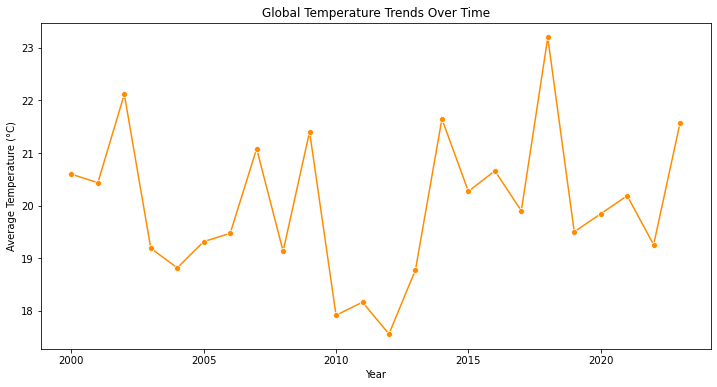

In [53]:
#Temperature Trends Over Time (Global Average)
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, x='Year', y='Avg temperature (°c)', ci=None, marker='o', color='darkorange')
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Global Temperature Trends Over Time")
plt.show()

If the line has an upward trend, it indicates global warming.

There may be spikes in certain years, possibly linked to extreme weather events or climate phenomena (e.g., El Niño).

If temperature variations are more extreme over time, it suggests increasing climate volatility.

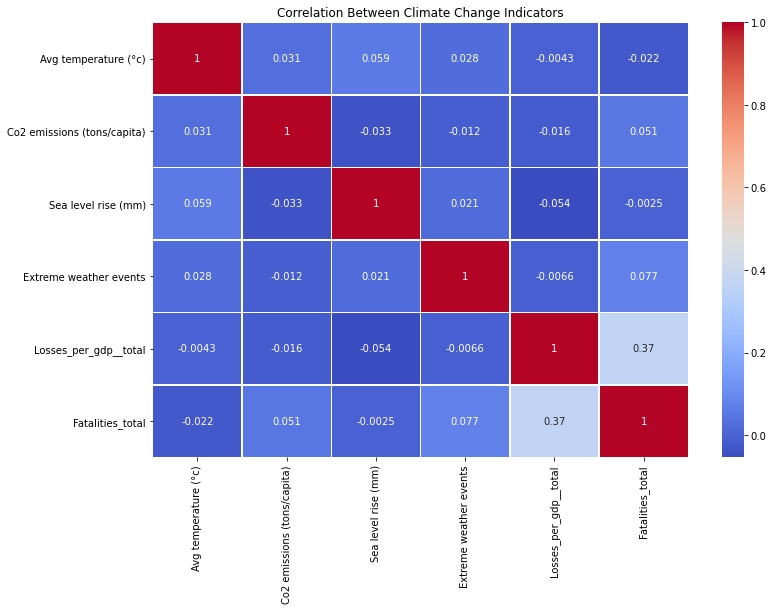

In [54]:
#Correlation Heatmap (Climate Indicators)
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_df[['Avg temperature (°c)', 'Co2 emissions (tons/capita)', 
                                 'Sea level rise (mm)', 'Extreme weather events', 
                                 'Losses_per_gdp__total', 'Fatalities_total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Climate Change Indicators")
plt.show()

Possible Observations

CO₂ Emissions vs. Avg Temperature (Expected Positive Correlation)

Higher CO₂ emissions should lead to higher global temperatures.

This is a key driver of climate change.

Sea Level Rise vs. Extreme Weather Events (Expected Positive Correlation)

Rising sea levels may contribute to stronger hurricanes and floods.

More flooding and storm surges occur in coastal areas.

Economic Losses (Losses per GDP) vs. Extreme Weather Events (Expected Positive Correlation)

More extreme weather events lead to higher economic losses.

Countries with frequent hurricanes, floods, and wildfires suffer greater financial damage.

Fatalities Total vs. Extreme Weather Events (Expected Positive Correlation)

More climate disasters result in higher fatalities.

Vulnerable countries (e.g., those with weak infrastructure) experience higher death tolls.


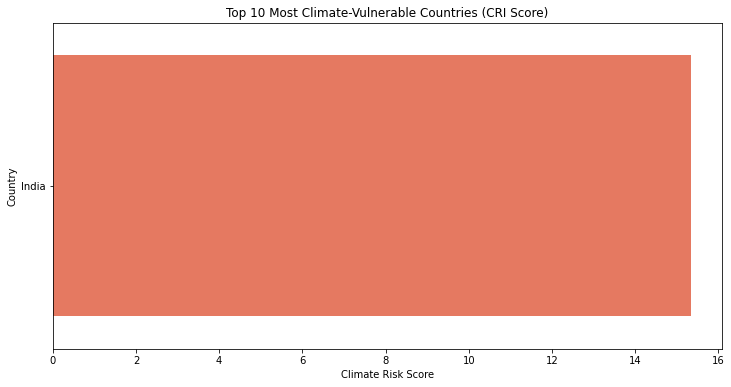

In [55]:
#Top 10 Countries by Climate Risk Index (CRI Rank)
top_risk_countries = cleaned_df.nsmallest(10, 'Cri_rank')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_risk_countries['Country'], x=top_risk_countries['Cri_score'], palette='Reds_r')
plt.xlabel("Climate Risk Score")
plt.ylabel("Country")
plt.title("Top 10 Most Climate-Vulnerable Countries (CRI Score)")
plt.show()

In [56]:
# Load and read the CSV
merged_df = pd.read_csv("Data/merged/final_merged_df.csv")


In [57]:
merged_df.columns

Index(['Unnamed: 0', 'Entity', 'Year',
       'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from e

In [58]:
# Load and read the CSV
merged_df_1= pd.read_csv("Data/merged/climate_data_final_df.csv")

In [59]:
merged_df_1.columns

Index(['Unnamed: 0', 'Entity', 'Year',
       'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from e